<a href="https://colab.research.google.com/github/anais-bod/DMML2022_-Orange-/blob/main/UNIL_Orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (5-10 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

### 3. Read data into your notebook with the Kaggle API (optional but useful). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [ ]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORTANT**  
Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file. Save it in your Google Drive (not in a folder, in your general drive).

In [ ]:
!mkdir ~/.kaggle

In [ ]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
!mkdir data

In [ ]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip "detecting-french-texts-difficulty-level-2022.zip" -d data

unzip:  cannot find or open detecting-french-texts-difficulty-level-2022.zip, detecting-french-texts-difficulty-level-2022.zip.zip or detecting-french-texts-difficulty-level-2022.zip.ZIP.


**Loading of data**

In [ ]:
# read in your training data
import pandas as pd
import numpy as np

df = pd.read_csv('/content/training_data.csv')
df_pred = pd.read_csv('/content/unlabelled_test_data.csv')

**Have a look on our data** 

In [ ]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
df.shape

(4800, 3)

In [ ]:
df.isnull().sum()

id            0
sentence      0
difficulty    0
dtype: int64

It seems that our data are quite clean.

In [ ]:
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


**Preparation of data for classification**

In [ ]:
#download last version of spacy
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#download the french language model
!python -m spacy download fr

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-20 14:46:54.941113: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'fr' are deprecated. Please use the
full pipeline package name 'fr_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 71.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Create a list of punctuation marks
import string

punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Doc2Vec

# Load French language model
sp = spacy.load('fr_core_news_sm')

# Create tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

# we use the above defined tokenizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) 

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
#features that we want to analyse

#independent variable
X=df["sentence"] 

#dependent variable
y=df["difficulty"]

#Test on unlabelled data
X_sub_test=df_pred["sentence"]

### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

In [ ]:
#Train Test split classic
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=0)

#### 4.1.Baseline
What is the baseline for this classification problem?

In [ ]:
np.random.seed = 0

In [ ]:
#Baseline

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(None, y)
 
base_line = dummy.score(None, y)
base_line

0.169375

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [ ]:
#import classification's test package
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#import Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
#Import package for Logistic Regression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#define classifer for Logistic regression
log_reg_classifier=LogisticRegression()

#### 4.2.1 With tf-idf, we are using a pipeline

In [ ]:
#Create pipeline
pipe_log_reg_classifier=Pipeline([('vectorizer',tfidf_vector),
                                  ('classifier', log_reg_classifier)])

#Fit model on training set
pipe_log_reg_classifier.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier', LogisticRegression())])

Calculate accuracy, precision, recall and F1 score on the test set.

In [ ]:
#Test accuracy
y_pred_logreg = pipe_log_reg_classifier.predict(X_test)
acc_test_logreg = accuracy_score(y_test, y_pred_logreg)

#Train accuracy
y_pred_train_logreg = pipe_log_reg_classifier.predict(X_train)
acc_train_logreg = accuracy_score(y_train,y_pred_train_logreg)

#Precision
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')

#Recall
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')

#F1-Score
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')

print("For Logistic Regression :")
print("Test accuracy :", acc_test_logreg*100)
print("Train accuracy :", acc_train_logreg*100)
print("Precision :", precision_logreg*100)
print("Recall :", recall_logreg*100)
print("F1-score :", f1_logreg*100)

For Logistic Regression :
Test accuracy : 46.458333333333336
Train accuracy : 84.140625
Precision : 46.15537968355972
Recall : 46.46687817296494
F1-score : 46.16656821476714


#### 4.2.3 Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [ ]:
conf_matrix_logreg = confusion_matrix(y_test,y_pred_logreg)

print("Confusion matrix with logistic regression: \n", conf_matrix_logreg)

Confusion matrix with logistic regression: 
 [[97 28 17  7  8  4]
 [51 63 28 11  7  4]
 [13 30 70 17 14 16]
 [ 8  6 18 59 25 28]
 [ 7  8 10 39 72 37]
 [12  6 11 16 28 85]]


The difficulty that is worst classified is B2.

#### 4.2.4 Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
#predicted unlabelled data with logistic regression

y_sub_pred_logreg = pipe_log_reg_classifier.predict(X_sub_test)

submission_result= {'id': df_pred["id"],
                    "difficulty": y_sub_pred_logreg }
submission_result_table=pd.DataFrame(data=submission_result)
submission_result_table.head(1200)

submission_result_table.to_csv("UNIL_Orange_logistic_regression.csv",sep=',',index=False)

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# import KNN packages 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Define classifer for kNN
KNN_classifier=KNeighborsClassifier()

#### 4.3.1 With tf-idf, we are using a pipeline

In [ ]:
#Create the grid
grid = {'n_neighbors':np.arange(1,30),
        'weights':['uniform','distance'],
        'p':[1,2,0.5]
       }
knn_cv = GridSearchCV(KNN_classifier, grid, cv=5, scoring = 'accuracy', return_train_score= False, verbose = 1, n_jobs = -1)

#Create pipeline
pipe_KNN_classifier=Pipeline([('vectorizer',tfidf_vector),
                              ('classifier',knn_cv)])

#Fit model on training set
pipe_KNN_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 174 candidates, totalling 870 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
290 fits failed out of a total of 870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/n

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                          'p': [1, 2, 0.5],
                                          'weights': ['uniform', 'distance']},
                              scoring='accuracy', verbose=1))])

In [ ]:
#Test accuracy
y_pred_knn = pipe_KNN_classifier.predict(X_test)
acc_test_knn = accuracy_score(y_test, y_pred_knn)

#Train accuracy
y_pred_train_knn = pipe_KNN_classifier.predict(X_train)
acc_train_knn = accuracy_score(y_train,y_pred_train_knn)

#Precision
precision_knn = precision_score(y_test, y_pred_knn, average='macro')

#Recall
recall_knn = recall_score(y_test, y_pred_knn, average='macro')

#F1-Score
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("For KNN :")
print("Test accuracy :", acc_test_knn*100)
print("Train accuracy :", acc_train_knn*100)
print("Precision :", precision_knn*100)
print("Recall :", recall_knn*100)
print("F1-score :", f1_knn*100)

For KNN :
Test accuracy : 34.89583333333333
Train accuracy : 99.84375
Precision : 39.972949523622084
Recall : 34.84958608246633
F1-score : 33.537359081215534


#### 4.3.2 Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
#Find the best parameters for KNN classification
print("Hyperparameters:", knn_cv.best_params_)

Hyperparameters: {'n_neighbors': 16, 'p': 2, 'weights': 'distance'}


Best parameters :
- n_neighbors = 16
- weights = 'distance' 
- p = 2

In [ ]:
# Train the KNN model using the best parameters
knn_classifier_opti=KNeighborsClassifier(n_neighbors=16, weights = 'distance', p=2)

pipe_KNN_classifier_opti=Pipeline([('vectorizer',tfidf_vector),
                              ('classifier',knn_classifier_opti)])

#Fit model on training set
pipe_KNN_classifier_opti.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=16, weights='distance'))])

In [ ]:
#Predict test & train model
y_pred_knn_opti=pipe_KNN_classifier_opti.predict(X_test)
y_train_pred_knn_opti=pipe_KNN_classifier_opti.predict(X_train)

#Test accuracy
acc_test_knn_opti=accuracy_score(y_test,y_pred_knn_opti)

#Train accuracy
acc_train_knn_opti=accuracy_score(y_train, y_train_pred_knn_opti)

#Precision
precision_knn_opti = precision_score(y_test, y_pred_knn_opti, average='macro')

#Recall
recall_knn_opti = recall_score(y_test, y_pred_knn_opti, average='macro')

#F1-Score
f1_knn_opti = f1_score(y_test, y_pred_knn_opti, average='macro')

print("For KNN, with hyperparameters:")
print("Test accuracy :", acc_test_knn_opti*100)
print("Train accuracy :", acc_train_knn_opti*100)
print("Precision :", precision_knn_opti*100)
print("Recall :", recall_knn_opti*100)
print("F1-score :", f1_knn_opti*100)

For KNN, with hyperparameters:
Test accuracy : 34.89583333333333
Train accuracy : 99.84375
Precision : 39.972949523622084
Recall : 34.84958608246633
F1-score : 33.537359081215534


#### 4.3.4 Have a look at the confusion matrix.

In [ ]:
conf_matrix_knn = confusion_matrix(y_test,y_pred_knn_opti)

print("Confusion matrix with knn: \n", conf_matrix_knn)

Confusion matrix with knn: 
 [[104  41  12   0   3   1]
 [ 92  51  15   1   2   3]
 [ 63  49  33   4   1  10]
 [ 25  35  23  27  10  24]
 [ 22  23  26  21  35  46]
 [ 25  26  11   5   6  85]]


#### 4.3.5 Generate our predictions

In [ ]:
y_sub_pred_knn = pipe_KNN_classifier_opti.predict(X_sub_test)

submission_result= {'id': df_pred["id"],
                    "difficulty": y_sub_pred_knn }
submission_result_table=pd.DataFrame(data=submission_result)
submission_result_table.head(1200)

submission_result_table.to_csv("UNIL_Orange_knn.csv",sep=',',index=False)

#### 4.4. Decision Tree Classifier 

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# import decision tree packages 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV

#### 4.4.1 With tf-idf, we are using a pipeline

In [ ]:
# DTC training
dtc = DecisionTreeClassifier(random_state=0)

#Create pipeline
pipe_dtc_classifier =Pipeline([('vectorizer',tfidf_vector),
                              ('classifier', dtc)])

#Fit model on training set
pipe_dtc_classifier.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [ ]:
#Test accuracy
y_pred_dtc = pipe_dtc_classifier.predict(X_test)
acc_test_dtc = accuracy_score(y_test, y_pred_dtc)

#Train accuracy
y_pred_train_dtc = pipe_dtc_classifier.predict(X_train)
acc_train_dtc = accuracy_score(y_train,y_pred_train_dtc)

#Precision
precision_dtc = precision_score(y_test, y_pred_dtc, average='weighted')

#Recall
recall_dtc = recall_score(y_test, y_pred_dtc, average='weighted')

#F1-Score
f1_dtc = f1_score(y_test, y_pred_dtc, average='weighted')

print("For decision tree : \n")
print("Test accuracy : ", acc_test_dtc*100)
print("Train accuracy : ", acc_train_dtc*100)
print("Precision : ", precision_dtc*100)
print("Recall : ", recall_dtc*100)
print("F1_score : ", f1_dtc*100)

For decision tree : 

Test accuracy :  29.895833333333332
Train accuracy :  99.84375
Precision :  29.846098961246735
Recall :  29.895833333333332
F1_score :  29.667672002348617


#### 4.4.2 Try to improve it by tuning the hyper parameters (`max_depth`).

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [ ]:
#tfidfisation of X_train & X_test manually
x_train_s = tfidf_vector.fit_transform(X_train)
y_train_s = tfidf_vector.fit_transform(y_train)
x_train_s=x_train_s.toarray()
y_train_s=y_train_s.toarray()

x_test_s = tfidf_vector.fit_transform(X_test)
y_test_s = tfidf_vector.fit_transform(y_test)
x_test_s=x_test_s.toarray()
y_test_s=y_test_s.toarray()

In [ ]:
tree_params = {"max_depth": range(1, 100)}

tree_grid = GridSearchCV(dtc, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(x_train_s, y_train_s)

Fitting 5 folds for each of 1782 candidates, totalling 8910 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 100),
                         'max_features': range(1, 19)},
             verbose=True)

[0.         0.02083333 0.03333333 0.04479167 0.08541667 0.08697917
 0.09244792 0.10885417 0.12239583 0.13671875 0.153125   0.17161458
 0.17552083 0.18541667 0.19973958 0.2078125  0.21484375 0.21770833
 0.22604167 0.23802083 0.24609375 0.24401042 0.25833333 0.25755208
 0.26145833 0.271875   0.27395833 0.27760417 0.28255208 0.27604167
 0.28177083 0.28932292 0.28671875 0.29401042 0.28802083 0.29192708
 0.29661458 0.29973958 0.29244792 0.30026042 0.29713542 0.30208333
 0.29947917 0.30651042 0.30182292 0.30572917 0.30052083 0.31145833
 0.309375   0.30208333 0.30651042 0.31328125 0.309375   0.30755208
 0.31067708 0.30859375 0.31276042 0.30807292 0.30911458 0.30130208
 0.30859375 0.30963542 0.30911458 0.30885417 0.30390625 0.31328125
 0.3078125  0.30911458 0.30807292]


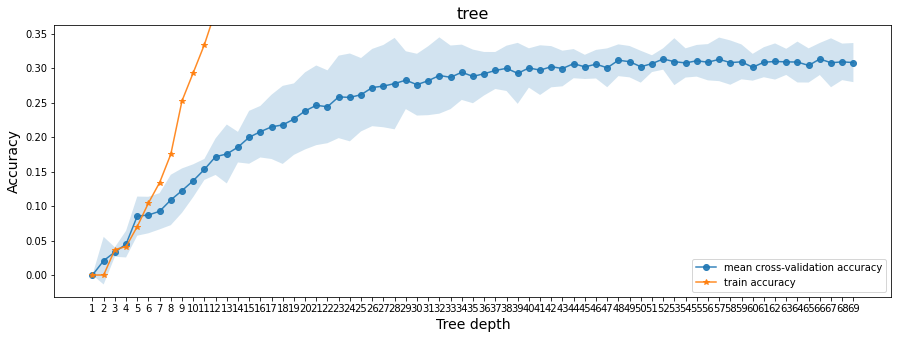

In [ ]:
# Find optimal parameter
treeDepthRange = list(range(1, 70))
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(x_train_s, y_train_s, treeDepthRange, scoring = 'accuracy')
plot_cross_validation_on_trees(treeDepthRange, cv_scores_mean, cv_scores_std, accuracy_scores, 'tree')
print(cv_scores_mean)

So, we found that max_depth = 66 and its score is 0.3132.

In [ ]:
# DTC training with max_depth = 66
dtc_opti = DecisionTreeClassifier(random_state=0,max_depth=66)

#Create pipeline
pipe_dtc_classifier_opti =Pipeline([('vectorizer',tfidf_vector),
                              ('classifier', dtc_opti)])

#Fit model on training set
pipe_dtc_classifier_opti.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=66, random_state=0))])

In [ ]:
#Test accuracy
y_pred_dtc_opti = pipe_dtc_classifier_opti.predict(X_test)
acc_test_dtc_opti = accuracy_score(y_test, y_pred_dtc_opti)

#Train accuracy
y_pred_train_dtc_opti = pipe_dtc_classifier_opti.predict(X_train)
acc_train_dtc_opti = accuracy_score(y_train,y_pred_train_dtc_opti)

#Precision
precision_dtc_opti = precision_score(y_test, y_pred_dtc_opti, average='weighted')

#Recall
recall_dtc_opti = recall_score(y_test, y_pred_dtc_opti, average='weighted')

#F1-Score
f1_dtc_opti = f1_score(y_test, y_pred_dtc_opti, average='weighted')

print("For decision tree with max_depth optimised : \n")
print("Test accuracy : ", acc_test_dtc_opti*100)
print("Train accuracy : ", acc_train_dtc_opti*100)
print("Precision : ", precision_dtc_opti*100)
print("Recall : ", recall_dtc_opti*100)
print("F1_score : ", f1_dtc_opti*100)

For decision tree with max_depth optimised : 

Test accuracy :  29.895833333333332
Train accuracy :  99.84375
Precision :  29.846098961246735
Recall :  29.895833333333332
F1_score :  29.667672002348617


#### 4.4.3 Have a look at the confusion matrix.

In [ ]:
conf_matrix_dtc = confusion_matrix(y_test,y_pred_dtc_opti)

print("Confusion matrix with decision tree : \n", conf_matrix_dtc)

Confusion matrix with decision tree : 
 [[78 39 17 14  3 10]
 [43 46 45 17  6  7]
 [33 21 36 33 20 17]
 [12 15 26 41 28 22]
 [13 21 14 51 37 37]
 [15 16 22 25 37 43]]


#### 4.4.4 Generate our predictions

In [ ]:
y_sub_pred_dtc = pipe_dtc_classifier_opti.predict(X_sub_test)

submission_result= {'id': df_pred["id"],
                    "difficulty": y_sub_pred_dtc}
submission_result_table=pd.DataFrame(data=submission_result)
submission_result_table.head(1200)

submission_result_table.to_csv("UNIL_Orange_dtc.csv",sep=',',index=False)

#### 4.5. Random Forest Classifier 

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# import random forest packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

#### 4.5.1 With tf-idf, we are using a pipeline

In [ ]:
# Random Forest training
rfc = RandomForestClassifier()

random_grid = {'n_estimators': np.arange(1,15),
               'max_features': ['auto', 'sqrt'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 10, cv = 5, verbose=2, random_state=0, 
                               n_jobs = -1)

#Create pipeline
pipe_rfc_classifier =Pipeline([('vectorizer',tfidf_vector),
                              ('classifier', rfc_random)])
#Fit model on training set
pipe_rfc_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                           

In [ ]:
#Train accuracy
y_pred_train_rfc = pipe_rfc_classifier.predict(X_train)
acc_train_rfc = accuracy_score(y_train,y_pred_train_rfc)

#Test accuracy
y_pred_rfc = pipe_rfc_classifier.predict(X_test)
acc_test_rfc = accuracy_score(y_test, y_pred_rfc)

#Precision
precision_rfc= precision_score(y_test, y_pred_rfc, average='weighted')

#Recall
recall_rfc = recall_score(y_test, y_pred_rfc, average='weighted')

#F1-Score
f1_rfc = f1_score(y_test, y_pred_rfc, average='weighted')

print ("For random Forest forest : \n")
print("Test accuracy: ",acc_test_rfc*100)
print("Train accuracy: ",acc_train_rfc*100)
print("Precision: ", precision_rfc*100)
print("recall: ",recall_rfc*100 )
print("F1-score: ",f1_rfc*100)

For random Forest forest : 

Test accuracy:  35.3125
Train accuracy:  81.84895833333333
Precision:  34.570649731966135
recall:  35.3125
F1-score:  34.22933423828376


#### 4.5.2 Try to improve it by tuning the hyper parameters (`n_estimators`, `min_samples_split`, `min_samples_leaf`, `max_features`, `bootstrap`).

In [ ]:
rfc_random.best_params_

{'n_estimators': 11,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'bootstrap': False}

In [ ]:
rfc_opti = RandomForestClassifier(n_estimators=11, min_samples_split=10, min_samples_leaf=1, max_features='sqrt',bootstrap=False)

#Create pipeline
pipe_rfc_classifier_opti =Pipeline([('vectorizer',tfidf_vector),
                              ('classifier', rfc_opti)])
#Fit model on training set
pipe_rfc_classifier_opti.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_features='sqrt',
                                        min_samples_split=10,
                                        n_estimators=11))])

In [ ]:
#Train accuracy
y_pred_train_rfc_opti = pipe_rfc_classifier_opti.predict(X_train)
acc_train_rfc_opti = accuracy_score(y_train,y_pred_train_rfc_opti)

#Test accuracy
y_pred_rfc_opti = pipe_rfc_classifier_opti.predict(X_test)
acc_test_rfc_opti = accuracy_score(y_test, y_pred_rfc_opti)

#Precision
precision_rfc_opti = precision_score(y_test, y_pred_rfc_opti, average='weighted')

#Recall
recall_rfc_opti = recall_score(y_test, y_pred_rfc_opti, average='weighted')

#F1-Score
f1_rfc_opti = f1_score(y_test, y_pred_rfc_opti, average='weighted')

print ("For random Forest forest with hyperparameters : \n")
print("Test accuracy: ",acc_test_rfc_opti*100)
print("Train accuracy: ",acc_train_rfc_opti*100)
print("Precision: ", precision_rfc_opti*100)
print("recall: ",recall_rfc_opti*100 )
print("F1-score: ",f1_rfc_opti*100)

For random Forest forest with hyperparameters : 

Test accuracy:  38.333333333333336
Train accuracy:  99.73958333333334
Precision:  37.67377980085473
recall:  38.333333333333336
F1-score:  37.463524335603964


#### 4.5.3 Have a look at the confusion matrix.

In [ ]:
conf_matrix_rfc = confusion_matrix(y_test,y_pred_rfc_opti)

print("Confusion matrix with decision tree : \n", conf_matrix_rfc)

Confusion matrix with decision tree : 
 [[113  19  13  12   1   3]
 [ 61  51  31  11   7   3]
 [ 38  29  39  27  12  15]
 [  7  14  21  46  28  28]
 [  7   6  14  46  60  40]
 [  9  17  10  26  37  59]]


#### 4.5.4 Generate our predictions

In [ ]:
y_sub_pred_rfc = pipe_rfc_classifier_opti.predict(X_sub_test)

submission_result= {'id': df_pred["id"],
                    "difficulty": y_sub_pred_rfc}
submission_result_table=pd.DataFrame(data=submission_result)
submission_result_table.head(1200)

submission_result_table.to_csv("UNIL_Orange_rfc.csv",sep=',',index=False)

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

#### 4.6.1 : Support Vector Classifier

In [ ]:
# import Support Vector Classifier model
from sklearn.svm import SVC 

# creat model's object
svc = SVC(kernel = 'rbf', random_state = 0,probability=True) 

In [ ]:
#create a pipeline
pipe_svc_classifier =Pipeline([('vectorizer',tfidf_vector),
                              ('classifier', svc)])

#Fit model on training set
pipe_svc_classifier.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f5892d4d820>)),
                ('classifier', SVC(probability=True, random_state=0))])

In [ ]:
#Test accuracy
y_pred_svc = pipe_svc_classifier.predict(X_test)
acc_test_svc = accuracy_score(y_test, y_pred_svc)

#Train accuracy
y_pred_train_svc = pipe_svc_classifier.predict(X_train)
acc_train_svc = accuracy_score(y_train,y_pred_train_svc)

#Precision
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')

#Recall
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')

#F1-Score
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print("For SVC :\n")
print("Test accuracy:", acc_test_svc*100)
print("Train accuracy:", acc_train_svc*100)
print("precison: ", precision_svc*100)
print("Recall: ",recall_svc*100)
print("F1-score: ",f1_svc*100)

For SVC :

Test accuracy: 47.604166666666664
Train accuracy: 97.65625
precison:  47.82714673397124
Recall:  47.604166666666664
F1-score:  47.48061677206277


In [ ]:
conf_matrix_svc = confusion_matrix(y_test,y_pred_svc)

print("Confusion matrix with decision tree : \n", conf_matrix_svc)

Confusion matrix with decision tree : 
 [[100  26  15  12   4   4]
 [ 47  66  30  10   7   4]
 [ 13  24  76  24  11  12]
 [  6   9  15  67  22  25]
 [  5   4  12  46  68  38]
 [  8   8  11  20  31  80]]


In [ ]:
y_sub_pred_svc = pipe_svc_classifier.predict(X_sub_test)

submission_result= {'id': df_pred["id"],
                    "difficulty": y_sub_pred_svc}
submission_result_table=pd.DataFrame(data=submission_result)
submission_result_table.head(1200)

submission_result_table.to_csv("UNIL_Orange_svc.csv",sep=',',index=False)

#### 4.6.2 : Combination of our best models

In order, to improve our model we try to combine our best model : SVC and Logistic Regression; to do that we use Voting Classifier.

In [ ]:
from sklearn.ensemble import VotingClassifier

# The ensemble is a voting classifier that aggregates our three models
voting_clf = VotingClassifier(estimators=[('svc', pipe_svc_classifier), ('log', pipe_log_reg_classifier)], 
                             voting='hard')

# training
voting_clf.fit(X_train, y_train) 

# predicting
y_pred_voting = voting_clf.predict(X_test) 
y_pred_train_voting = voting_clf.predict(X_train)

#test accuracy
acc_test_voting=accuracy_score(y_test, y_pred_voting) 

#train accuracy
acc_train_voting=accuracy_score(y_train, y_pred_train_voting) 

#precision
precision_voting=precision_score(y_test, y_pred_voting, average='weighted')

#recall
recall_voting=recall_score(y_test,y_pred_voting, average='weighted')

#F1-Score
f1_voting=f1_score(y_test,y_pred_voting, average='weighted')

print("For combination of SVC and logistic regression :\n")
print("Test accuracy:", acc_test_voting*100)
print("Train accuracy:", acc_train_voting*100)
print("precison: ", precision_voting*100)
print("Recall: ",recall_voting*100)
print("F1-score: ",f1_voting*100)

For combination of SVC and logistic regression :

Test accuracy: 46.458333333333336
Train accuracy: 90.75520833333334
precison:  46.54305951575122
Recall:  46.458333333333336
F1-score:  46.165376388132735


In [ ]:
y_sub_pred_voting = voting_clf.predict(X_sub_test)

submission_result= {'id': df_pred["id"],
                    "difficulty": y_sub_pred_voting}
submission_result_table=pd.DataFrame(data=submission_result)
submission_result_table.head(1200)

submission_result_table.to_csv("UNIL_Orange_voting.csv",sep=',',index=False)

## 4.7 Data embeddings

In [ ]:
#data embeddings

with sp.disable_pipes():
  vectors=np.array([sp(df.sentence).vector for idx, df in df.iterrows()])

#Train Test split with data embeddings
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(vectors, y, shuffle=True, test_size=0.2, random_state=0)

print(vectors)

[[ 2.5883105  -0.33783805  0.13447323 ...  0.97380996  1.1547624
  -1.078923  ]
 [ 0.94273067 -0.6742985   0.15778159 ... -0.28917786 -0.03423569
  -0.666285  ]
 [ 2.7945724  -0.1999102  -0.97981477 ...  0.7726029   0.32259616
  -1.3696183 ]
 ...
 [ 1.488277    0.5429954   0.9237242  ... -0.18500942  0.7239595
  -1.2453126 ]
 [ 2.4329228   0.22139306  0.1050107  ...  0.14463039  0.52459884
  -1.0780774 ]
 [ 1.0723747   0.2760727  -0.21915495 ... -0.54481524  1.5861492
  -0.5349116 ]]


Logistic regression with data embeddings

In [ ]:
#Fit model on training set, with data embeddings
log_reg_classifier.fit(X_train_v,y_train_v)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Calculate accuracy, precision, recall and F1 score on the test set.

In [ ]:
#Test accuracy
y_pred_logreg_v = log_reg_classifier.predict(X_test_v)
acc_test_logreg_v = accuracy_score(y_test_v, y_pred_logreg_v)

#Train accuracy
y_pred_train_logreg_v = log_reg_classifier.predict(X_train_v)
acc_train_logreg_v = accuracy_score(y_train_v,y_pred_train_logreg_v)

#Precision
precision_logreg = precision_score(y_test_v, y_pred_logreg_v, average='macro')

#Recall
recall_logreg = recall_score(y_test_v, y_pred_logreg_v, average='macro')

#F1-Score
f1_logreg = f1_score(y_test_v, y_pred_logreg_v, average='macro')

print("For Logistic Regression, with vectors :")
print("Test accuracy :", acc_test_logreg*100)
print("Train accuracy :", acc_train_logreg*100)
print("Precision :", precision_logreg*100)
print("Recall :", recall_logreg*100)
print("F1-score :", f1_logreg*100)

For Logistic Regression, with vectors :
Test accuracy : 46.458333333333336
Train accuracy : 84.140625
Precision : 40.394402255739564
Recall : 40.591058367706836
F1-score : 40.23201226803402


We are noting that our results are significantly not better with text embeddings than with pipeline. None results changed expect training accuracy. So we won't apply further this method.

#### 4.8. Show a summary of your results

In [ ]:
table_test= {'Model': ['Logistic regression', 'KNN', 'Decsision tree',"Random Forest","SVC", "Combination of SVC and Log regression"],
             'test accuracy': [acc_test_logreg*100,acc_test_knn_opti*100 ,acc_test_dtc_opti*100,acc_test_rfc_opti*100,acc_test_svc*100,acc_test_voting*100],
             'train accuracy':[acc_train_logreg*100,acc_train_knn_opti*100,acc_train_dtc_opti*100,acc_train_rfc_opti*100,acc_train_svc*100,acc_train_voting*100],
             'precision': [precision_logreg*100,precision_knn_opti*100,precision_dtc_opti*100,precision_rfc_opti*100,precision_svc*100, precision_voting*100],
             'recall': [recall_logreg*100,recall_knn_opti*100,recall_dtc_opti*100,recall_rfc_opti*100,recall_svc*100,recall_voting*100],
             'F1-Score':[f1_logreg*100,f1_knn_opti*100,f1_dtc_opti*100,f1_rfc_opti*100,f1_svc*100,f1_voting*100]
             }
comp_table_test=pd.DataFrame(table_test)
comp_table_test

,Model,test accuracy,train accuracy,precision,recall,F1-Score
0,Logistic regression,46.458333,84.140625,40.394402,40.591058,40.232012
1,KNN,34.895833,99.843750,39.972950,34.849586,33.537359
2,Decsision tree,29.270833,97.864583,29.157923,29.270833,28.986279
3,Random Forest,38.333333,99.739583,37.673780,38.333333,37.463524
4,SVC,47.604167,97.656250,47.827147,47.604167,47.480617
5,Combination of SVC and Log regression,46.458333,90.755208,46.543060,46.458333,46.165376
